# Applying Machine Learning to Ames housing data to predict sale prices
## Shameer Sukha - Jan 2020

This notebook applies machine learning techniques to the Ames housing data to predict **sales prices** from various other variables related to a house. It is in response to the NYDSA - Machine Learning project.

It conducts a walk-through of the data science lifecycle for machine learning comprising of data cleaning, imputation, analysis, wrangling, visualisation and finally modelling.

## Import necessary packages 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer

## Print information about data for reference

In [2]:

filename = '.\data\data_description.txt'
with open(filename) as f:
    for line in f:
        print(line)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

## Load Data
1. Use downloaded train data from Kaggle, test data is not useful since it does not contain SalePrice because of competition
2. Use 70/30 split to hold-out 30% of training data but only after all data cleaning and pre-processing completed.


In [3]:
# Read .csv files
housing = pd.read_csv('./data/train.csv')
housing.shape

(1460, 81)

## Data Exploration
1. Create useful initial summary of variables, which will help with **missingness** and **feature selection**
2. Create charts and stats to summarise SalePrice target variable
3. Create charts and stats to summarise SalePrice with features expected to be important
3. Create charts and stats to understand relationships amongst all variables with themselves and avoid multicollinearity

In [4]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
def bespoke_pcorr(df, response, varname):
    """
    Takes a dataframe df of numerical variables and returns a dataframe of the 
    correlation of response variable with other variables in df and labels the 
    column varname.
    """
    response_corr = pd.DataFrame(df.corr(method='pearson')[response]).reset_index()
    response_corr.columns = [varname, 'PearsonCorr']
    return response_corr


def bespoke_outliers(df, factor, varname):
    """
    Takes a dataframe df of numerical variables and returns a dataframe of the 
    number of outliers past factor multiple of the inter-quartile range according to the Tukey method.
    """
    # Define helper function to count outliers in a given column col past a factor multiple of the
    # inter-quartile range
    def count_outliers(col, factor):
        try:
            #1st quartile (25%)
            Q1 = np.percentile(col, 25)
            # 3rd quartile (75%)
            Q3 = np.percentile(col, 75)
            # Interquartile range (IQR)
            IQR = Q3 - Q1
        
            # outlier step
            outlier_step = factor * IQR
        
            # Determine a list of indices of outliers for feature col
            numout = col[(col < Q1 - outlier_step) | (col > Q3 + outlier_step)].shape[0]
            return numout
        except:
            return 0

    outliers = pd.DataFrame(df.apply(lambda x: count_outliers(x, factor), axis=0)).reset_index()
    outliers.columns = [varname, 'NumOutliers']
    
    return outliers   


# Define own function to summarise data
def summarise_data(df, response):
    """
    Takes a dataframe df of numerical of numerical and categorical variables and creates a bespoke
    summary that is helpful for regression/predictive tasks. The target variable is identified with 
    response input and the rest are assumed to be features.
    
    Output shows columns as follows:
    1. Predictor variable name
    2. Count of values in feature 
    3. Count of missing values
    4. Total length of column
    5. Percentage missing in each feature
    6. Type of feature: numerical or categorical
    7. If categorical variable, then number of catgories
    8. If numerical variable, the skewness (0 being no skew of Normal dist)
    9. If numerical variable, Pearson correlation with target variable identified in response
    10. If numerical variable, Number of outliers based on Tukey's method of factor (1.5) times inter-quartile range
    """
    tempdf = pd.DataFrame(df.count()).reset_index()
    tempdf.columns = ['Predictor', 'ValueCount']
    tempdf['MissingCount'] = tempdf['Predictor'].apply(lambda x: df[x].isnull().sum())
    tempdf['TotalCount'] = tempdf['ValueCount'] + tempdf['MissingCount']
    tempdf['MissingPercent'] = tempdf['MissingCount'] / len(df)
    tempdf['VariableType'] = tempdf['Predictor'].apply(lambda x: 'categorical' if df[x].dtype=='object' else 'numerical')
    tempdf['CountCategories'] = [len(df[col].value_counts()) if df[col].dtype == 'object' else 0 for col in 
                          tempdf['Predictor'].values]
    tempdf['Skewness'] = [stats.skew(df[col]) if df[col].dtype != 'object' else 0 for col in 
                          tempdf['Predictor'].values]
    tempdf = tempdf.merge(bespoke_pcorr(df, response, 'Predictor'), how='left', on='Predictor')
    tempdf = tempdf.merge(bespoke_outliers(df, 1.5, 'Predictor'), how='left', on='Predictor')
    tempdf.reset_index(drop=True, inplace=True)
        
    return tempdf


In [6]:
# Variables with missing values ranked by percentage missing
summarydf = summarise_data(housing, 'SalePrice')
mask = summarydf.MissingPercent > 0
missing_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('MissingPercent', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
72,PoolQC,7,1453,1460,0.995205,categorical,3,0.0,NaN,0
74,MiscFeature,54,1406,1460,0.963014,categorical,4,0.0,NaN,0
6,Alley,91,1369,1460,0.937671,categorical,2,0.0,NaN,0
73,Fence,281,1179,1460,0.807534,categorical,4,0.0,NaN,0
57,FireplaceQu,770,690,1460,0.472603,categorical,5,0.0,NaN,0
3,LotFrontage,1201,259,1460,0.177397,numerical,0,NaN,0.351799,30
58,GarageType,1379,81,1460,0.055479,categorical,6,0.0,NaN,0
59,GarageYrBlt,1379,81,1460,0.055479,numerical,0,NaN,0.486362,0
60,GarageFinish,1379,81,1460,0.055479,categorical,3,0.0,NaN,0
63,GarageQual,1379,81,1460,0.055479,categorical,5,0.0,NaN,0


In [7]:
summarydf

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
0,Id,1460,0,1460,0.000000,numerical,0,0.000000,-0.021917,0
1,MSSubClass,1460,0,1460,0.000000,numerical,0,1.406210,-0.084284,103
2,MSZoning,1460,0,1460,0.000000,categorical,5,0.000000,NaN,0
3,LotFrontage,1201,259,1460,0.177397,numerical,0,NaN,0.351799,30
4,LotArea,1460,0,1460,0.000000,numerical,0,12.195142,0.263843,69
...,...,...,...,...,...,...,...,...,...,...
76,MoSold,1460,0,1460,0.000000,numerical,0,0.211835,0.046432,0
77,YrSold,1460,0,1460,0.000000,numerical,0,0.096170,-0.028923,0
78,SaleType,1460,0,1460,0.000000,categorical,9,0.000000,NaN,0
79,SaleCondition,1460,0,1460,0.000000,categorical,6,0.000000,NaN,0


In [8]:
# Store lists of names of numerical and categorical features
mask = summarydf.VariableType == 'categorical'
categorical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of categorical variables are: %.0i' %len(categorical_vars))
mask = summarydf.VariableType == 'numerical'
numerical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of numerical variables are: %.0i' %len(numerical_vars))

The number of categorical variables are: 43
The number of numerical variables are: 38


In [9]:
# Variables with skewness greater than 0.6, ranked by skewness
mask = (np.abs(summarydf.Skewness) > 0.6) & (summarydf.VariableType == 'numerical')
skew_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('Skewness', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
75,MiscVal,1460,0,1460,0.0,numerical,0,24.451640,-0.021190,52
71,PoolArea,1460,0,1460,0.0,numerical,0,14.813135,0.092404,7
4,LotArea,1460,0,1460,0.0,numerical,0,12.195142,0.263843,69
69,3SsnPorch,1460,0,1460,0.0,numerical,0,10.293752,0.044584,24
45,LowQualFinSF,1460,0,1460,0.0,numerical,0,9.002080,-0.025606,26
52,KitchenAbvGr,1460,0,1460,0.0,numerical,0,4.483784,-0.135907,68
36,BsmtFinSF2,1460,0,1460,0.0,numerical,0,4.250888,-0.011378,167
70,ScreenPorch,1460,0,1460,0.0,numerical,0,4.117977,0.111447,116
48,BsmtHalfBath,1460,0,1460,0.0,numerical,0,4.099186,-0.016844,82
68,EnclosedPorch,1460,0,1460,0.0,numerical,0,3.086696,-0.128578,208


In [10]:
# Variables that are highly correlated with SalePrice for initial indication of useful features
mask = (np.abs(summarydf.PearsonCorr) > 0.5) & (summarydf.VariableType == 'numerical')
salescorr_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('PearsonCorr', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
80,SalePrice,1460,0,1460,0.0,numerical,0,1.880941,1.000000,61
17,OverallQual,1460,0,1460,0.0,numerical,0,0.216721,0.790982,2
46,GrLivArea,1460,0,1460,0.0,numerical,0,1.365156,0.708624,31
61,GarageCars,1460,0,1460,0.0,numerical,0,-0.342197,0.640409,5
62,GarageArea,1460,0,1460,0.0,numerical,0,0.179796,0.623431,21
38,TotalBsmtSF,1460,0,1460,0.0,numerical,0,1.522688,0.613581,61
43,1stFlrSF,1460,0,1460,0.0,numerical,0,1.375342,0.605852,20
49,FullBath,1460,0,1460,0.0,numerical,0,0.036524,0.560664,0
54,TotRmsAbvGrd,1460,0,1460,0.0,numerical,0,0.675646,0.533723,30
19,YearBuilt,1460,0,1460,0.0,numerical,0,-0.612831,0.522897,7


In [11]:
# Variables with large number of outliers ranked by count of possible outliers
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('NumOutliers', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
68,EnclosedPorch,1460,0,1460,0.000000,numerical,0,3.086696,-0.128578,208
36,BsmtFinSF2,1460,0,1460,0.000000,numerical,0,4.250888,-0.011378,167
18,OverallCond,1460,0,1460,0.000000,numerical,0,0.692355,-0.077856,125
70,ScreenPorch,1460,0,1460,0.000000,numerical,0,4.117977,0.111447,116
1,MSSubClass,1460,0,1460,0.000000,numerical,0,1.406210,-0.084284,103
26,MasVnrArea,1452,8,1460,0.005479,numerical,0,NaN,0.477493,96
48,BsmtHalfBath,1460,0,1460,0.000000,numerical,0,4.099186,-0.016844,82
67,OpenPorchSF,1460,0,1460,0.000000,numerical,0,2.361912,0.315856,77
4,LotArea,1460,0,1460,0.000000,numerical,0,12.195142,0.263843,69
52,KitchenAbvGr,1460,0,1460,0.000000,numerical,0,4.483784,-0.135907,68


In [12]:
def chart_singlevar_dist(df, response):
    """
    Takes a dataframe df with identified target variable in response  and plots histogram, box plot and qq-plot. 
    This will help to quickly identify normality.
    """
    fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=3, sharex=False, sharey=False)
    
    sns.distplot(df[response], norm_hist=True, ax=ax[0,0])
    sns.boxplot(df[response], ax=ax[1,0])
    stats.probplot(df[response], plot=ax[2,0])
    #ax[2,0].set(title='')   
    
    sns.distplot(np.log1p(df[response]), norm_hist=True, ax=ax[0,1])
    ax[0,1].set(xlabel = 'log 1+'+response)
    sns.boxplot(np.log1p(df[response]), ax=ax[1,1])
    ax[1,1].set(xlabel = 'log 1+'+response)
    stats.probplot(np.log1p(df[response]), plot=ax[2,1])
    ax[2,1].set(xlabel = 'log 1+'+response, title='')
    
    return fig.show()

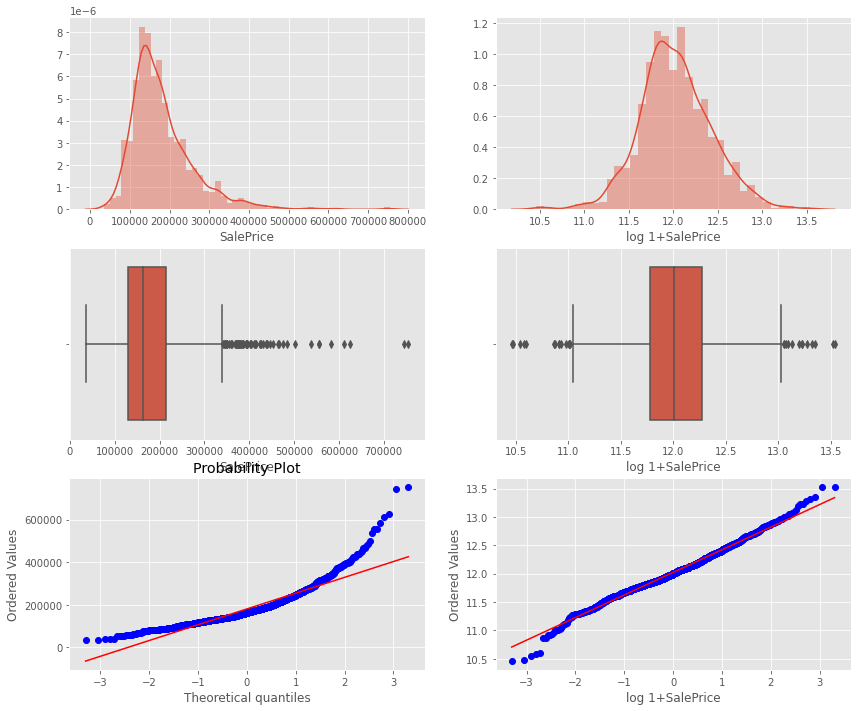

In [13]:
chart_singlevar_dist(housing, 'SalePrice')

In [14]:
def corr_plot(df, varlist):
    """
    Takes a dataframe df and plots a correlation chart of all combinations of variables identified
    in varlist list of variable names.
    """
    train_corr = df[varlist].corr(method='pearson')
    fig, ax = plt.subplots(figsize=(10, 8))
    # mask
    mask = np.triu(np.ones_like(train_corr, dtype=np.bool))
    # adjust mask and df
    corr = train_corr.iloc[1:,:-1].copy()
    # plot heatmap
    sns.heatmap(train_corr, mask=mask, annot=False, fmt=".2f", cmap='Blues',
                vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    # yticks
    plt.yticks(rotation=0)
    return plt.show()

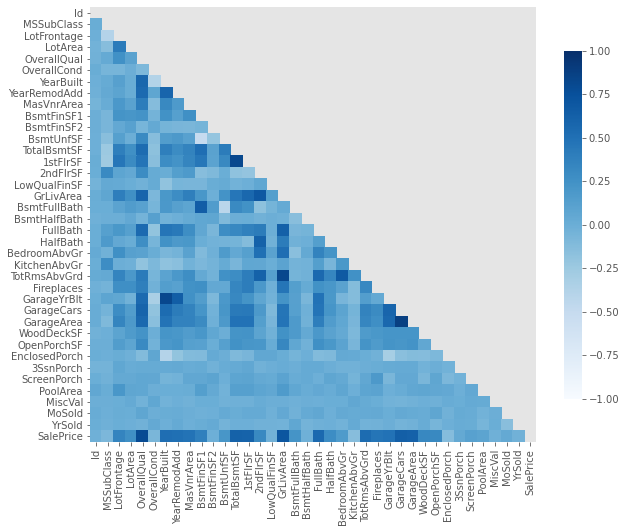

In [15]:
# Correlation plot of all variables
corr_plot(housing, list(housing.columns))

In [16]:
# Correlation plot of predictor variables with abs(corr) > 0.7 to detect multicollinearity
corr_matrix = housing.drop(['Id','SalePrice'], axis=1).corr(method='pearson').corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol = pd.DataFrame(sol).reset_index()
sol.columns = ['var1','var2','cor']
print(sol.loc[sol.cor > 0.7,:])
mcvar = list(sol.loc[sol.cor > 0.7,:].drop('cor', axis=1).melt().value.unique())

            var1          var2       cor
0     GarageCars    GarageArea  0.986128
1      YearBuilt   GarageYrBlt  0.973001
2    TotalBsmtSF      1stFlrSF  0.964331
3      GrLivArea  TotRmsAbvGrd  0.944207
4   YearRemodAdd   GarageYrBlt  0.901431
5    OverallQual    GarageCars  0.896461
6      YearBuilt  YearRemodAdd  0.876491
7     BsmtFinSF1  BsmtFullBath  0.875490
8    OverallQual    GarageArea  0.871251
9    GarageYrBlt    GarageCars  0.846997
10  BedroomAbvGr  TotRmsAbvGrd  0.845900
11     YearBuilt    GarageCars  0.837271
12   OverallQual     YearBuilt  0.836299
13   OverallQual   GarageYrBlt  0.828565
14   OverallQual  YearRemodAdd  0.825378
15   OverallQual      FullBath  0.825283
16     GrLivArea      FullBath  0.821656
17      2ndFlrSF      HalfBath  0.812587
18   GarageYrBlt    GarageArea  0.811146
19     YearBuilt    GarageArea  0.805244
20   TotalBsmtSF    GarageArea  0.763880
21      FullBath  TotRmsAbvGrd  0.761889
22      FullBath    GarageCars  0.761067
23  YearRemodAdd

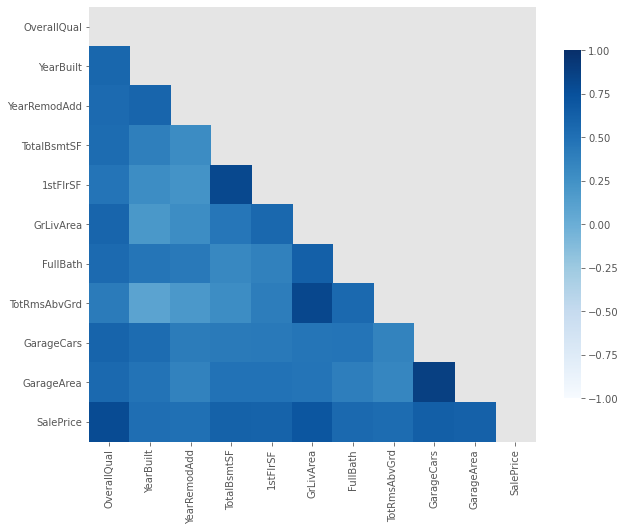

In [17]:
# Correlation plot of variables with >0.6 correlation with SalePrice to identify features that are useful
corr_plot(housing, salescorr_vars)

## Data Exploration Insights
1. There are 80 features with a sample of 1460 homes that we can use to try model SalePrice of homes in Ames. 
2. The features consist of 37 numerical and 43 categorical variables and has lots of missing data as well as apparent outliers.
3. There are a few skewed distributions of features, which would require some sort of transformation if using linear models to predict SalePrice.
4. The distribution of SalePrice itself, is skewed-right and a log transformation makes the data look decently normal, which is encouraging if we want to apply the class of linear models.
5. Important predictors of SalePrice are: OverallQual, YearBuilt, variables related to size, variables related to Garage.
6. Initial assessments of Pearson correlation coefficients indicate there is duplicate information within features like: GarageCars/GarageArea, YrBuilt/GarageYrBlt, TotalBsmtSF/1stFlrSF, GrLivArea/TotRmsAbvGrd.
7. Before conducting feature engineering, we will pre-process data for missingness and duplication

## Dealing with missingness
1. Most data are not missing at random, they represent the lack of feature i.e don't have a pool or fireplace

In [18]:
# Straightforward in that missing means not available or present, set those to N (consistent with other variables with No)
setnolist = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',\
             'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2','BsmtFinType1', 'BsmtCond',\
             'BsmtQual', 'MasVnrType']
housing[setnolist] = housing[setnolist].fillna('N')

In [19]:
# These variables are no straightforward to complete missingness

# Electrical
housing['Electrical'].value_counts()
# The catgory Mix represents a mixed electrical system and there is only one house, use this for the single missing value
# since it won't make a material difference.
housing['Electrical'] = housing['Electrical'].fillna('Mix')

# MasVnrArea
msonlist = ['MasVnrArea', 'MasVnrType']
housing.loc[housing['MasVnrArea'].isnull(), msonlist]
# It turns out that all of the houses with missing MasVnrArea don't have a Masonry Veneer. So can set to 0
housing['MasVnrArea'].fillna(0,inplace=True)

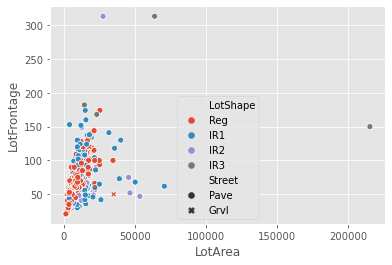

In [20]:
#LotFrontage
lotlist = ['LotFrontage', 'LotArea', 'LotShape', 'Street']
housing.loc[housing['LotFrontage'].isnull(), lotlist]

# See relationship between LotFront and Lot Area
normlot=housing[lotlist]
#normlot = housing[lotlist].dropna()
#normlot = normlot.loc[normlot[['LotFrontage', 'LotArea']].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sns.scatterplot(data=normlot, x='LotArea', y='LotFrontage', hue='LotShape', style='Street')

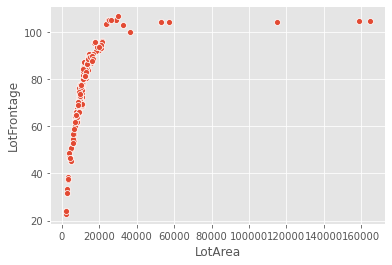

In [21]:
# LotFrontage appears to be Missing at Random (MAR) so use kNN imputation
# Sqrt(1200) is about 35, so use that for K, which will also be robust to outliers (which is present)
imputer = KNNImputer(n_neighbors=35)
lotlist = ['LotFrontage', 'LotArea']
imputedvals = pd.DataFrame(imputer.fit_transform(housing[lotlist]), columns=lotlist)
sns.scatterplot(data=imputedvals.loc[housing['LotFrontage'].isnull(), lotlist], x='LotArea', y='LotFrontage')
# Most of the data imputation <50000 LotArea makese sense but there are a few outliers for larger LotArea. This is fine for now
# because we will still deal with outliers later.
housing['LotFrontage'] = imputedvals['LotFrontage']

In [22]:
garagelist = ['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual']
print(housing.loc[housing['GarageYrBlt'].isnull(), garagelist]['GarageType'].shape)
print(housing.loc[housing['GarageYrBlt'].isnull(), garagelist]['GarageType'].value_counts())
# Easy one to solve, GarageYrBlt is not missing at random, it is because there is no Garage. Impute with zeros
housing['GarageYrBlt'].fillna(0,inplace=True)

(81,)
N    81
Name: GarageType, dtype: int64


In [23]:
# Check for missing values in total dataset again
summarydf = summarise_data(housing, 'SalePrice')
mask = summarydf.MissingPercent > 0
missing_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('MissingPercent', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers


In [ ]:
# Excellent! we have dealt with all missing values.

In [24]:
################################################################################################################################
################################################################################################################################

In [25]:






df['MSZoning'].fillna('N')


df['Exterior1st'].fillna('N')
df['Exterior2nd'].fillna('N')
df['Utilities'].fillna('N')

df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'].fillna(0)
df['FullBath'].fillna(0)
df['HalfBath'].fillna(0)
df['KitchenQual'].fillna('N')
df['Functional'].fillna('N')




df['GarageCars'].fillna(0)
df['GarageArea'].fillna(0,inplace=True)


df['BsmtFinSF2'].fillna(0,inplace=True)

df['BsmtFinSF1'].fillna(0,inplace=True)
df['SaleType'].fillna('N')
df['BsmtUnfSF'].fillna(0,inplace=True)
df['TotalBsmtSF'].fillna(0,inplace=True)







df["AllSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
df['Area'] = df['LotArea']*df['LotFrontage']
df['Area_log'] = np.log1p(df['Area'])

NameError: name 'df' is not defined

In [ ]:
# Code to remove outliers
outliers = df[['gross', 'budget']].dropna()
outliers = outliers.loc[~outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [ ]:
# Code for jointplot of 2 variables
sns.jointplot(df['num_critic_for_reviews'], df['imdb_score'])

In [ ]:
# Aggregating different stats for different variables
colFun = {'country':['count'],
          'population': ['sum','min', 'max','mean','std'], 
          'area': ['sum','min', 'max','mean'],
          'coastline':['sum','min', 'max'],
          'birthrate':['min', 'max','mean','std'],
          'deathrate':['min', 'max','mean','std'],
          'life expectancy':['min', 'max','mean','std']}
analysis=group.agg(colFun)
analysis